## Number of bug reports submitted

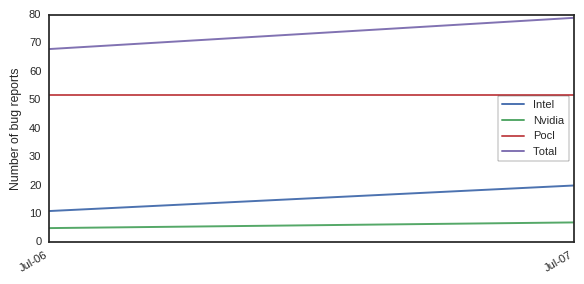

In [11]:
import re
import dateutil.parser
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns

from labm8 import fs
from labm8 import viz
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(style="ticks", color_codes=True)
plt.style.use(["seaborn-white", "seaborn-paper"])
matplotlib.rcParams['figure.dpi'] = 120

def lc(path):
    with open(path) as infile:
        return len(infile.readlines())
    
def lc_by_vendor(path):
    counts = dict()
    with open(path) as infile:
        for line in infile:
            m = re.search("bug-report-([^-]+)-", line)
            vendor = m.group(1).capitalize()
            counts[vendor] = counts.get(vendor, 0) + 1
    counts["Total"] = sum(counts.values())
    return counts

dates, data = [], []
for log in fs.ls("../data/bug-reports/.logs", abspaths=True):
    date = dateutil.parser.parse(fs.basename(log).replace(".txt", ""))
    dates.append(date)
    data.append(lc_by_vendor(log))

ax = pd.DataFrame(data, index=dates).plot()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.get_legend().draw_frame(True)
plt.ylabel("Number of bug reports")
viz.finalise(figsize=(6, 3))

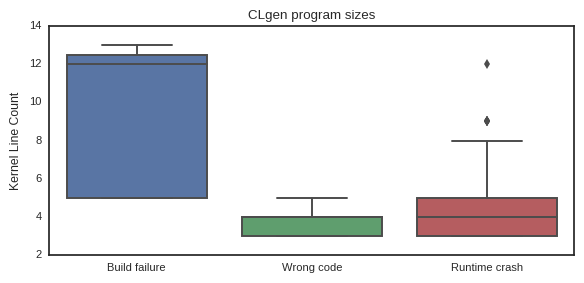

In [12]:
import db as db
import sqlalchemy as sql

from db import *
%run util.py

hostname = "cc1"
db.init(hostname)

TABLES = [
    (coCLgenResult, "Compiler errors"),
    (cl_launcherCLgenResult, "Miscompilation"),
]

data = []
with Session(commit=False) as s:
    for table, name in TABLES:
        q = s.query(table).filter(table.submitted)
        data += [{"Bug type": result.classification, "Kernel Line Count": len(result.program.src.strip().split('\n'))} for result in q]
        
ax = sns.boxplot(x="Bug type", y="Kernel Line Count", data=pd.DataFrame(data))
plt.xlabel("")
plt.title("CLgen program sizes")
viz.finalise(figsize=(6, 3))